# Covid-19 Detection using Deep Learning

## Importing all the necessary libraries

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

## Building Convolutional Neural Network (CNN) 

In [12]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


## Producing Training and Testing Datasets by creating custom data generator and the training the above created model.

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

hist=classifier.fit_generator(training_set,
                         steps_per_epoch = 170,
                         epochs = 4,
                         validation_data = test_set,
                         validation_steps = 50)


Found 5518 images belonging to 2 classes.
Found 953 images belonging to 2 classes.


/Users/rakshitbatra/opt/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:1919: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
170/170 [==============================] - 74s 434ms/step - loss: 0.3655 - accuracy: 0.8416 - val_loss: 0.4084 - val_accuracy: 0.8080
Epoch 2/4
170/170 [==============================] - 61s 360ms/step - loss: 0.2433 - accuracy: 0.8973
Epoch 3/4
170/170 [==============================] - 61s 359ms/step - loss: 0.2245 - accuracy: 0.9100
Epoch 4/4
170/170 [==============================] - 57s 338ms/step - loss: 0.2118 - accuracy: 0.9107


## Saving and Loading Model for Prediction

### Saving the trained model in ".json" and ".h5" for future use purpose

In [7]:
model_json = classifier.to_json()
with open("Covid_model.json", "w") as json_file:
    json_file.write(model_json)
classifier.save_weights('Covid_model.h5')

### Loading the saved model

In [5]:
json_file = open('Covid_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("Covid_model.h5")
print("Loaded model from disk")

Loaded model from disk


## Checking the trained model by making prediction using some sample Chest X-Rays to detect whether the person is Covid Positive or Not.

In [18]:
img_pred = image.load_img('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/normal.jpeg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

##Save model to json
import os
from keras.models import model_from_json

clssf = classifier.to_json()
with open("Covid.json", "w") as json_file:
    json_file.write(clssf)
classifier.save_weights("Covid.h5")
print("model saved to disk....")
print(prediction)


model saved to disk....
Normal


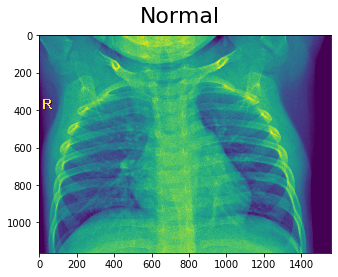

In [6]:
img_src = '/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/normal.jpeg'
img = cv2.imread(img_src)

img_pred = image.load_img('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/normal.jpeg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=22)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

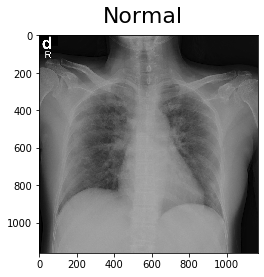

In [7]:
img_src = '/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/covid19.jpg'
img = cv2.imread(img_src)

img_pred = image.load_img('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/covid19.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=22)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

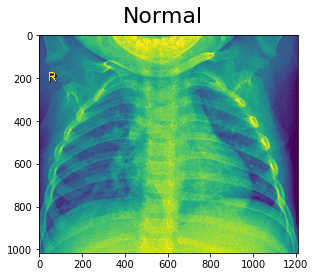

In [8]:
img_src = '/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Val/Normal/NORMAL2-IM-0873-0001.jpeg'
img = cv2.imread(img_src)

img_pred = image.load_img('/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Val/Normal/NORMAL2-IM-0873-0001.jpeg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=22)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

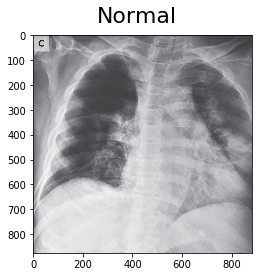

In [9]:
img_src = '/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Val/Covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg'
img = cv2.imread(img_src)

img_pred = image.load_img('/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Val/Covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=22)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)